In [1]:
# BASIC IMPORTS
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
!ls

Regression Analysis.ipynb


In [162]:
#IMPORT DATA

df = pd.read_csv("/Users/piyushpandey/Documents/github/data_science/practical_stats/data/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<AxesSubplot:>

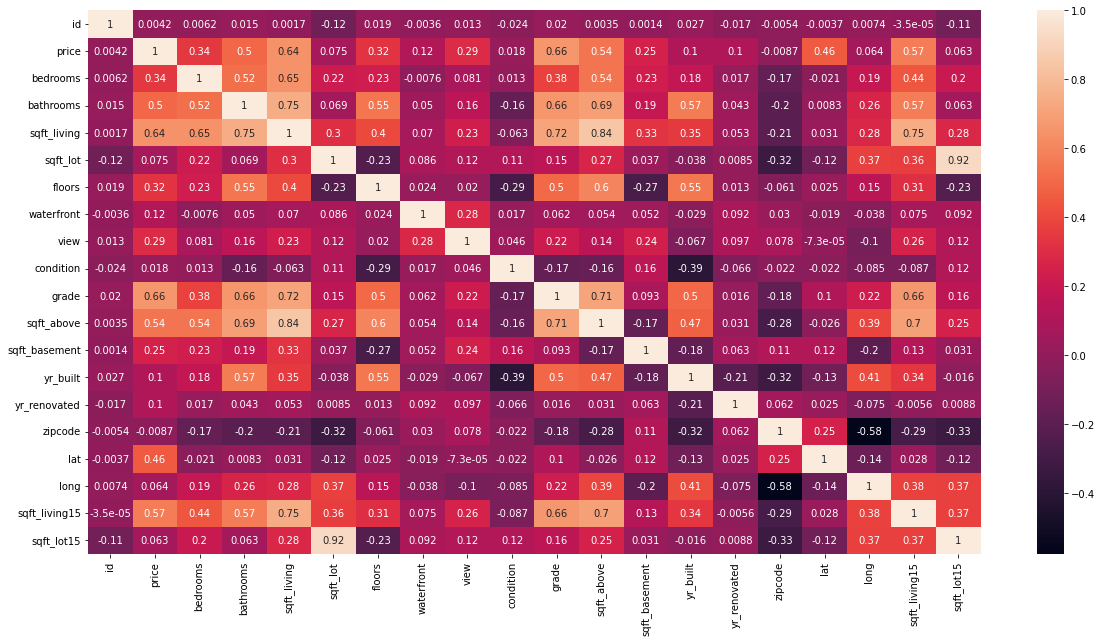

In [163]:
# CHCECK CORRELATION BETWEEN DEPENDENT AND INDEPENDENT VARIABLES
plt.rc("figure", figsize =(20,10))
sns.heatmap(df.corr(method='spearman'), annot=True)

In [164]:
# take features which are highly correlated with target feature
from sklearn.preprocessing import MinMaxScaler
X = df.drop(['price','id','date'],axis=1)
Y= df['price']

#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

# scaling
scaler = MinMaxScaler()

num_vars = X_train.columns

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])


X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5268,0.090909,0.1250,0.096604,0.003023,0.0,0.0,0.0,0.75,0.500000,0.085526,0.103734,0.347826,0.0,0.575758,0.865852,0.162636,0.240063,0.006581
16909,0.090909,0.3125,0.112453,0.006348,0.0,0.0,0.0,0.75,0.583333,0.100877,0.118257,0.695652,0.0,0.025253,0.645810,0.304420,0.334617,0.010395
16123,0.090909,0.1875,0.060377,0.005659,0.0,0.0,0.0,0.50,0.583333,0.087719,0.000000,0.756522,0.0,0.368687,0.755509,0.398666,0.229557,0.010581
12181,0.121212,0.3125,0.144906,0.003973,0.4,0.0,0.0,0.50,0.583333,0.210526,0.000000,0.808696,0.0,0.151515,0.425768,0.276063,0.275083,0.007293
12617,0.090909,0.3125,0.113962,0.002570,0.4,0.0,0.0,0.50,0.500000,0.104167,0.116183,0.739130,0.0,0.595960,0.788322,0.126772,0.243565,0.004723


## Linear Regression

In [165]:
# USE FEATURE SELECTION TECHNIQUE TO SELECT IMPORTANT FEATURES

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
rfe = RFE(model,n_features_to_select=10) # HOW MANY IMPOORTANT FEATURES WE WANT
rfe.fit(X_train,y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('bedrooms', True, 1),
 ('bathrooms', True, 1),
 ('sqft_living', True, 1),
 ('sqft_lot', False, 3),
 ('floors', False, 9),
 ('waterfront', True, 1),
 ('view', False, 2),
 ('condition', False, 7),
 ('grade', True, 1),
 ('sqft_above', True, 1),
 ('sqft_basement', True, 1),
 ('yr_built', True, 1),
 ('yr_renovated', False, 8),
 ('zipcode', False, 6),
 ('lat', True, 1),
 ('long', False, 5),
 ('sqft_living15', False, 4),
 ('sqft_lot15', True, 1)]

In [166]:
# ANALYSIS IS DONE ON IMPORTANT FEATURES ONLY
X_train_rfe = X_train[X_train.columns[rfe.support_]]

In [167]:
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X

In [168]:
X_train_rfe.head()

,bedrooms,bathrooms,sqft_living,waterfront,grade,sqft_above,sqft_basement,yr_built,lat,sqft_lot15
5268,0.090909,0.1250,0.096604,0.0,0.500000,0.085526,0.103734,0.347826,0.865852,0.006581
16909,0.090909,0.3125,0.112453,0.0,0.583333,0.100877,0.118257,0.695652,0.645810,0.010395
16123,0.090909,0.1875,0.060377,0.0,0.583333,0.087719,0.000000,0.756522,0.755509,0.010581
12181,0.121212,0.3125,0.144906,0.0,0.583333,0.210526,0.000000,0.808696,0.425768,0.007293
12617,0.090909,0.3125,0.113962,0.0,0.500000,0.104167,0.116183,0.739130,0.788322,0.004723


In [169]:
# VIF TO FIND MULTICOLENIARITY VIF = (1/(1-R^2))   R^2 IS CORRELATION COFFICIENT

def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [170]:
# BUILD MODEL AND ANALYSE P VALUE AND COEF

X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     4145.
Date:                Sun, 06 Mar 2022   Prob (F-statistic):               0.00
Time:                        15:49:56   Log-Likelihood:            -2.3638e+05
No. Observations:               17290   AIC:                         4.728e+05
Df Residuals:                   17280   BIC:                         4.729e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.994e+05   1.34e+04    -37.324

**The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis. In other words, a predictor that has a low p-value is likely to be a meaningful addition to your model because changes in the predictor's value are related to changes in the response variable.**

In [171]:
# CHECK VIF TO IDENTIFY AND REMOVE MULTICOLLINEARITY 
checkVIF(X_train_rfe)

/Users/piyushpandey/miniforge3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
2,sqft_living,inf
5,sqft_above,inf
6,sqft_basement,inf
4,grade,42.20
1,bathrooms,25.59
0,bedrooms,17.10
7,yr_built,11.18
8,lat,9.70
9,sqft_lot15,1.25
3,waterfront,1.04


In [172]:
# drop sqft_above because of high vif value [vif = 1/(1-R2)] . for perfect correlation we get r^2 = 1 and vif = infinity
# we can also see that the coef of sqft_above is low as compared to other with inf value hence remove this
X_train_rfe = X_train_rfe.drop('sqft_above',axis=1)

In [173]:
# ANALYSE AGAIN TILL ALL VALUES P-VALUE IS BELOW 0.5 AND VIF <5 
X_train_rfe = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     4145.
Date:                Sun, 06 Mar 2022   Prob (F-statistic):               0.00
Time:                        15:49:56   Log-Likelihood:            -2.3638e+05
No. Observations:               17290   AIC:                         4.728e+05
Df Residuals:                   17280   BIC:                         4.729e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.994e+05   1.34e+04    -37.324

In [174]:
checkVIF(X_train_rfe)

,Features,VIF
0,const,70.45
3,sqft_living,4.75
5,grade,3.01
2,bathrooms,3.00
7,yr_built,1.65
1,bedrooms,1.63
6,sqft_basement,1.45
8,lat,1.09
9,sqft_lot15,1.07
4,waterfront,1.03


In [175]:
# remove waterfront to see if it changes the model statistics
x_train_new = X_train_rfe.drop('waterfront',axis=1)
x_train_new = build_model(x_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     3994.
Date:                Sun, 06 Mar 2022   Prob (F-statistic):               0.00
Time:                        15:49:57   Log-Likelihood:            -2.3728e+05
No. Observations:               17290   AIC:                         4.746e+05
Df Residuals:                   17281   BIC:                         4.746e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.831e+05   1.41e+04    -34.303

**No change in model statistics after removing waterfront hence it is confirmed that it was an independent variable**

In [176]:
# no change in VIF values as well
checkVIF(x_train_new)

,Features,VIF
0,const,70.40
3,sqft_living,4.73
4,grade,3.01
2,bathrooms,3.00
6,yr_built,1.64
1,bedrooms,1.62
5,sqft_basement,1.45
7,lat,1.09
8,sqft_lot15,1.07


## 1. Residual Analysis of Mode

In [177]:
lm = sm.OLS(y_train,X_train_rfe).fit()
y_train_price = lm.predict(X_train_rfe)

/Users/piyushpandey/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

<Figure size 1440x720 with 0 Axes>

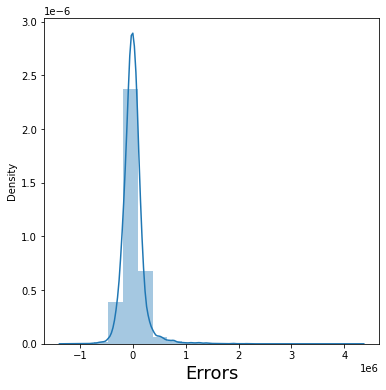

In [178]:
# Plot the histogram of the error terms
fig = plt.figure()
plt.figure(figsize=(6,6))
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

The errors are right skewed but most of them are centered around zero

## Prediction and evaluation

In [180]:
# Now let's use our model to make predictions.
X_train_new = X_train_rfe.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [181]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [182]:
# NOT THAT GREAT
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.6757858199553927

Text(0, 0.5, 'y_pred')

<Figure size 1440x720 with 0 Axes>

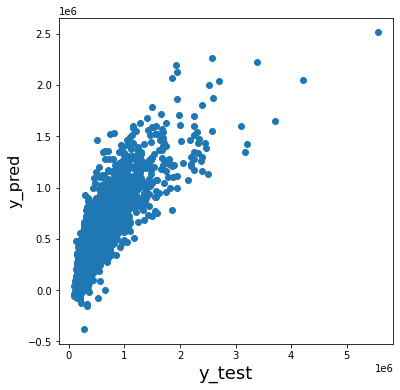

In [183]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

Some linear correlation can be seen the correlation is not that good

In [192]:
from sklearn.linear_model import Lasso
lm  = Lasso(alpha=0.5)
lm.fit(X_train_new, y_train)

Lasso(alpha=0.5)

In [193]:
y_pred_new = lm.predict(X_test_new.drop('const',axis=1))

Text(0, 0.5, 'y_pred')

<Figure size 1440x720 with 0 Axes>

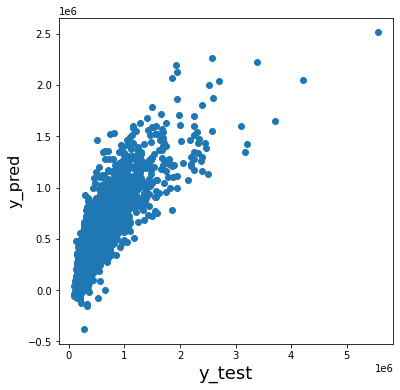

In [194]:
fig = plt.figure()
plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred_new)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

## Support Vector Regressor

In [212]:
from sklearn.svm import SVR
reg = SVR(degree =2, C=0.01, kernel='linear')
reg.fit(X_train_new,y_train)
y_pred_new = reg.predict(X_test_new.drop('const',axis=1))

Text(0, 0.5, 'y_pred')

<Figure size 1440x720 with 0 Axes>

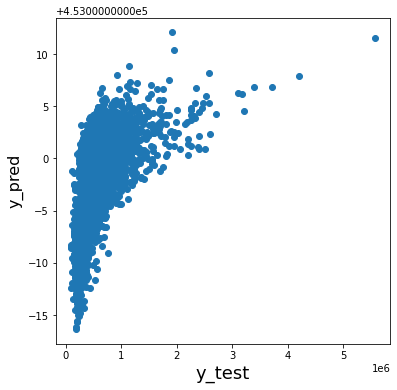

In [213]:
fig = plt.figure()
plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred_new)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

## Decision Tree Regressor

In [201]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()
reg.fit(X_train_new, y_train)
y_pred_new = reg.predict(X_test_new.drop('const',axis=1))


Text(0, 0.5, 'y_pred')

<Figure size 1440x720 with 0 Axes>

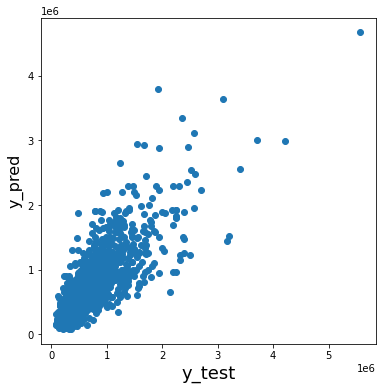

In [202]:
fig = plt.figure()
plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred_new)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

In [203]:
reg.feature_names_in_

array(['bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'grade',
       'sqft_basement', 'yr_built', 'lat', 'sqft_lot15'], dtype=object)

In [204]:
reg.feature_importances_

array([0.00662937, 0.0179415 , 0.27421078, 0.04715017, 0.34808249,
       0.01590185, 0.06680441, 0.17567072, 0.04760871])

## Random Forest Regressor

In [195]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train_new, y_train)

RandomForestRegressor()

In [196]:
y_pred_new = reg.predict(X_test_new.drop('const',axis=1))

Text(0, 0.5, 'y_pred')

<Figure size 1440x720 with 0 Axes>

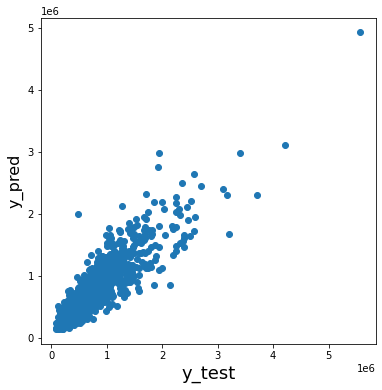

In [197]:
fig = plt.figure()
plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred_new)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

In [199]:
reg.feature_importances_

array([0.00832084, 0.01961138, 0.34920978, 0.04444217, 0.27065482,
       0.01650594, 0.06507059, 0.18015143, 0.04603305])